# Netflix Data Analysis 2008 - 2021

### Author

Name: Winfrey De Vera <br>
Section: 1ITE

<img src="netflix img.png">

## About the Data

<b>About the data: </b> Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

<table>
    <tr>
        <th>Category</th>
        <th>Description</th>
    </tr>
    <tr>
        <td>show_id</td>
        <td>the netflix show's id</td>
    </tr>
    <tr>
        <td>title</td>
        <td>title of the netflix show</td>
    </tr>
    <tr>
        <td>director</td>
        <td>director of the netflix show</td>
    </tr>
    <tr>
        <td>cast</td>
        <td>list of cast of the netflix show</td>
    </tr>
    <tr>
        <td>country</td>
        <td>the country where the netflix show is from</td>
    </tr>
    <tr>
        <td>date_added</td>
        <td>the date the show was added to netflix</td>
    </tr>
    <tr>
        <td>release_year</td>
        <td>the year the show was released to public</td>
    </tr>
    <tr>
        <td>rating</td>
        <td>the show's content rating</td>
    </tr>
    <tr>
        <td>duration</td>
        <td>the duration of the show or movie</td>
    </tr>
    <tr>
        <td>listed_in</td>
        <td>a list on what category the show is listed</td>
    </tr>
    <tr>
        <td>description</td>
        <td>a short descripton about the show</td>
    </tr>
</table>






## Import of Python Modules

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
import datetime
import matplotlib.pyplot as plt

## Reading Data Set and Converting Date to datetime object

In [2]:
netflix = pd.read_csv("netflix_titles_2021.csv")
netflix['date_added'] = pd.to_datetime(netflix['date_added'])

## Setting up matplotlib style and layout

In [3]:
plt.style.use('seaborn-pastel')
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

## Data Overview

In [4]:
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## Movies or TV shows?

In [5]:
netflix_type = []
netflix_type_sum = []
netflix_type_count = Counter(netflix['type'])

for item, total in netflix_type_count.items():
    netflix_type.append(item)
    netflix_type_sum.append(total)

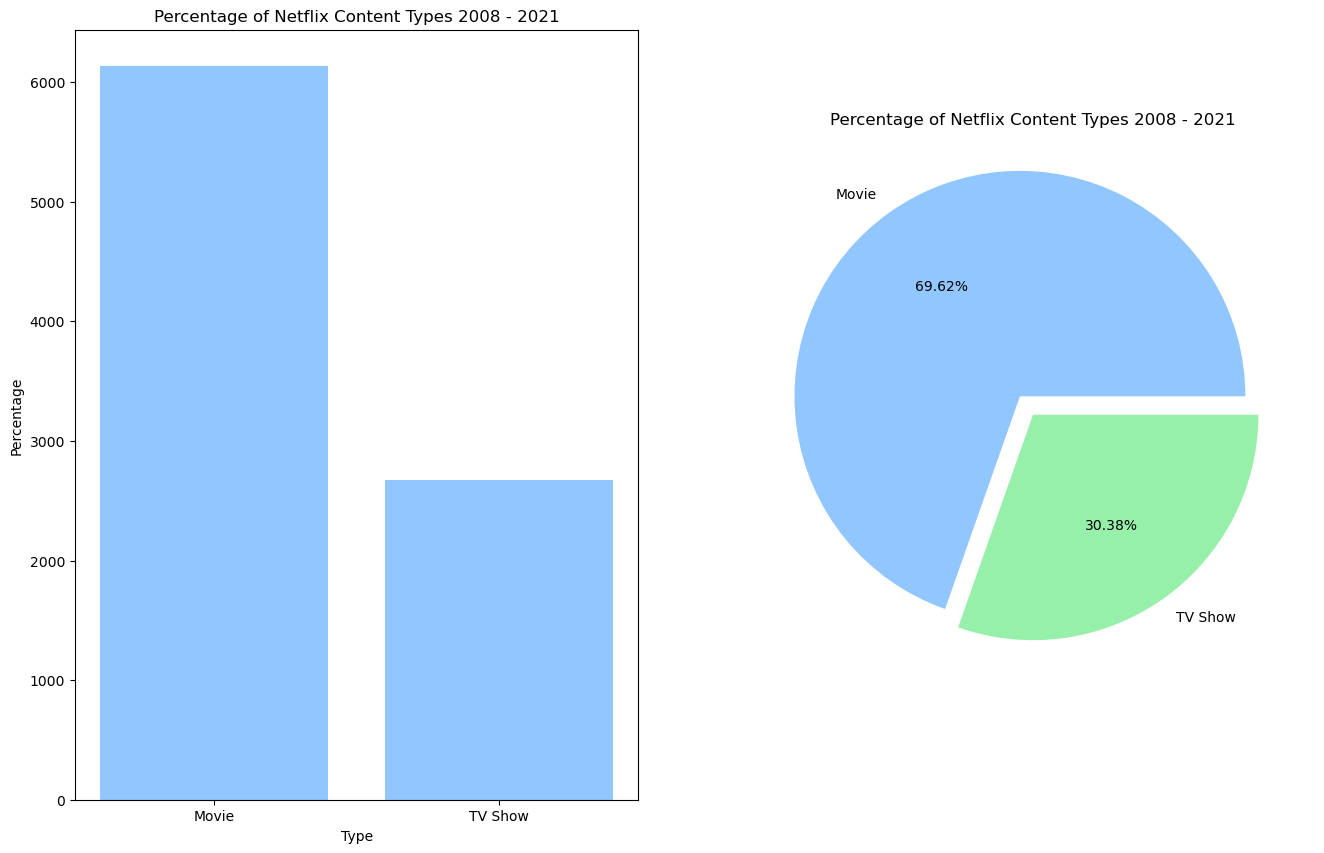

In [6]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
ax1.set_title('Percentage of Netflix Content Types 2008 - 2021')
ax1.bar(netflix_type, netflix_type_sum)
ax1.set_ylabel('Percentage')
ax1.set_xlabel('Type')

ax2.set_title('Percentage of Netflix Content Types 2008 - 2021')
ax2.pie(netflix_type_sum, labels=netflix_type, autopct='%.2f%%', explode=([.1, 0]))

plt.show()

## Insights

From the two graphs above we can see in the bar graph that almost 6000 shows in netflix are Movies and the number of TV shows are around 2000 to 3000 in number. In the pie graph on the right we can see that Netflix is composed 69.62% Movies and 30.38% TV Shows. We can conclude here that netflix mostly is compose of movies than TV shows. 

## Countries Production

In [7]:
netflix = netflix.dropna(subset="country")

top_producing_countries = (
    netflix['country']
    .dropna()
    .str.split(', ')
    .explode()
    .value_counts()
    .head(10)
    .sort_values()
)

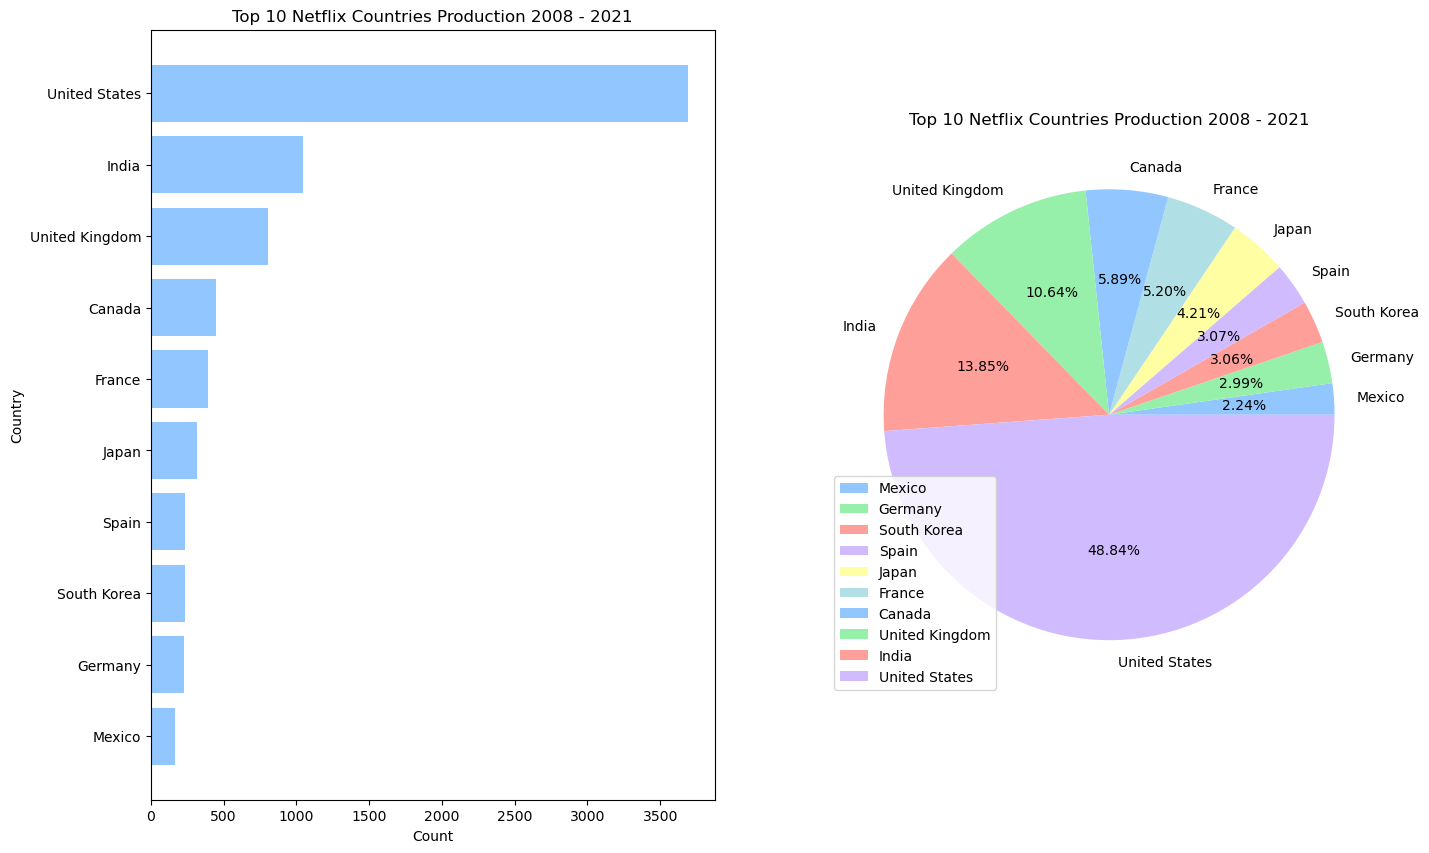

In [8]:

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 10))
# ax1.style.use('seaborn-pastel')
ax1.set_title('Top 10 Netflix Countries Production 2008 - 2021')
ax1.barh(top_producing_countries.index, top_producing_countries.values)
ax1.set_ylabel('Country')
ax1.set_xlabel('Count')

ax2.set_title('Top 10 Netflix Countries Production 2008 - 2021')
ax2.pie(top_producing_countries.values, labels=top_producing_countries.index, autopct='%.2f%%')
ax2.legend()
plt.show()

## Insights

We can see in the graph above the top 10 netflix shows country production. We can see that almost 3,500 shows are produced from the United States. We can also see from the pie graph on the right the that 48.84% of netflix shows are produced in the United States and 13.85% are from India. We can conclude here that most shows in netflix are produced in the United States and second is in India, and 10.64% from UK.

# Date Added Distribution and Release Year Distribution

In [9]:
netflix_movies = netflix[netflix['type'] == 'Movie']
netflix_shows = netflix[netflix['type'] == 'TV Show']

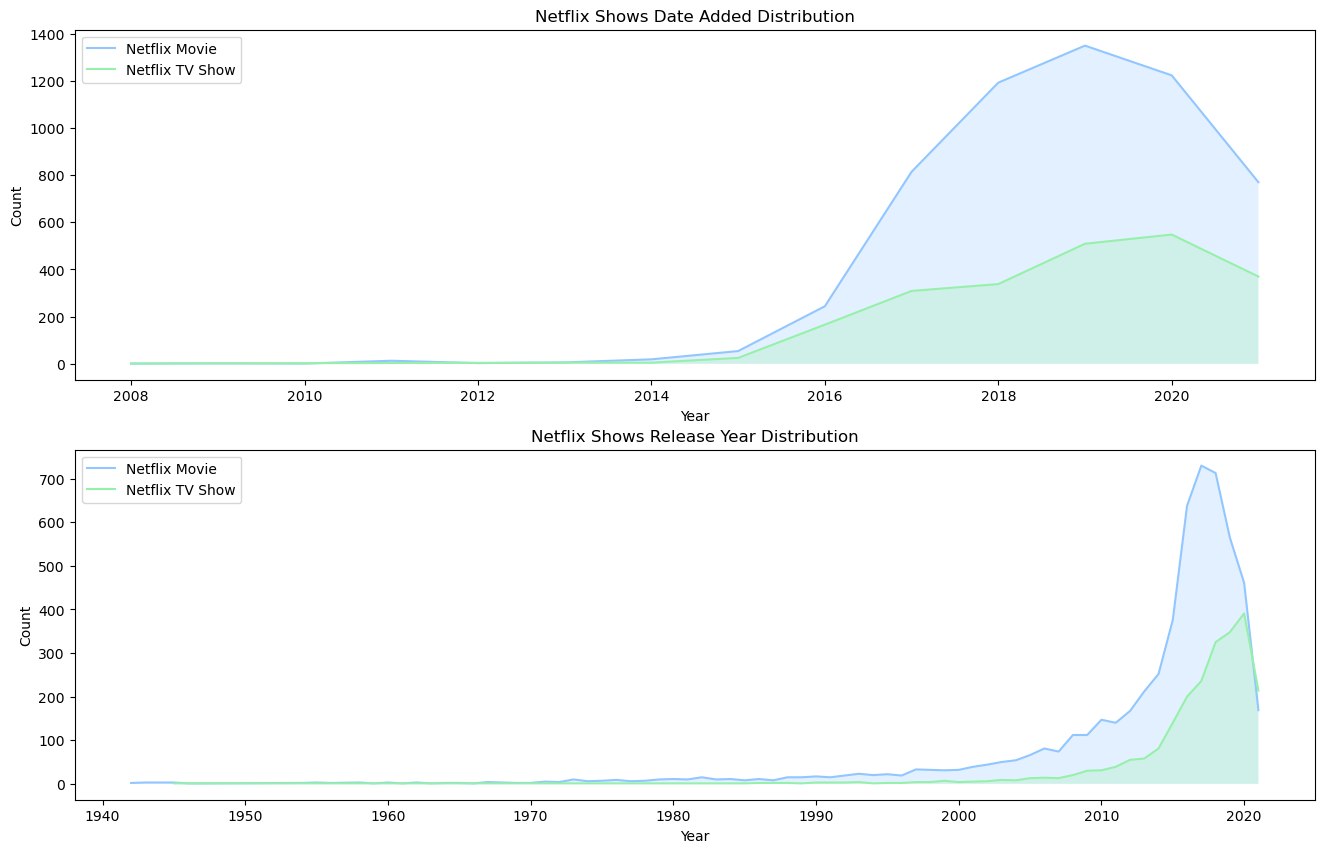

In [10]:
netflix_movies_date_added = netflix_movies.groupby(netflix_movies.date_added.dt.year).size()
netflix_shows_date_added = netflix_shows.groupby(netflix_shows.date_added.dt.year).size()
netflix_movies_release_year = netflix_movies.groupby(netflix_movies.release_year).size()
netflix_shows_release_year = netflix_shows.groupby(netflix_shows.release_year).size()

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(16, 10))

ax1.set_title("Netflix Shows Date Added Distribution")
ax1.set_xlabel('Year')
ax1.set_ylabel('Count')
ax1.plot(netflix_movies_date_added)
ax1.plot(netflix_shows_date_added)
ax1.fill_between(netflix_movies_date_added.index, netflix_movies_date_added.values, alpha=0.25)
ax1.fill_between(netflix_shows_date_added.index, netflix_shows_date_added.values, alpha=0.25)
ax1.legend(['Netflix Movie', 'Netflix TV Show'])

ax2.set_title("Netflix Shows Release Year Distribution")
ax2.set_xlabel('Year')
ax2.set_ylabel('Count')
ax2.plot(netflix_movies_release_year)
ax2.plot(netflix_shows_release_year)
ax2.fill_between(netflix_movies_release_year.index, netflix_movies_release_year.values, alpha=0.25)
ax2.fill_between(netflix_shows_release_year.index, netflix_shows_release_year.values, alpha=0.25)
ax2.legend(['Netflix Movie', 'Netflix TV Show'])
plt.show()

## Insights

In the first graph we can see that netflix added a number of shows around 2018 to 2020 and the number of shows being added started to decline by the end of 2020. We can conclude here that netflix started to trend in early 2016 and started to release a number of shows until 2019 and the number of shows being added started to decrease in number after during the pandemic 2019-2021.

In the second graph we can see that mostly of netflix shows is around the year 2010 and 2020. A number of TV shows are release in probably late 2019 and a number of Movies in netflix are release from probably around 2016 to 2018. We can conclude here that in that from around 2019 to 2020 netflix has been adding newer TV shows than adding newer Movies.